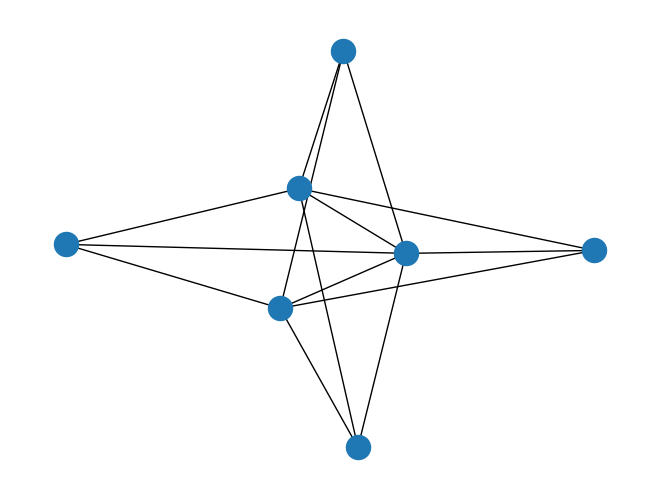

In [1]:
from turtle import up
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric.utils as utils
from utils import *
from model import UpdateRule


height = 1
width = 3
hidden_dim = 64

n_inputs = 2
n_outputs = 2


update_rule = UpdateRule(
    n_inputs, 
    n_outputs,
    hidden_dim,
    32
)
update_rule.build_graph(
    height,
    width
)


update_rule.draw()

In [2]:
from datasets import *
import copy
import numpy as np
np.set_printoptions(precision=1, suppress=True)



# dataset_loader = DataLoader(TranslateDataset(), batch_size=1, shuffle=True)

meta_set = MetaDataset()

optimizer = torch.optim.Adam(update_rule.parameters(), lr=0.0005)

best_loss = 10000
best_model = None

n_steps = 1
batch_size = 1
for epoch in range(10000):
    loss = 0
    for _ in range(batch_size):
        for set_idx in meta_set.iterate():
            update_rule.reset() 
            x = update_rule.initial_state(height, width)
        
            for idx, (problem_data_x, problem_data_y) in enumerate(meta_set.get_set(set_idx)):
                output_data = None#torch.zeros_like(problem_data_y.float())
                # if idx == meta_set.get_set_size() - 1:
                #     output_data = None#problem_data_y.float()
        
                x = update_rule(x, n_steps, problem_data_x.float(), output_data)
                    
                break
                
            network_output = update_rule.get_output(x)
            # loss = F.mse_loss(problem_data_y.float().squeeze(0), network_output)
            loss += F.mse_loss(problem_data_y.float().squeeze(0), network_output)
            # loss.backward()  
    if loss < best_loss:
        # best_model = copy.deepcopy(update_rule)
        best_loss = loss
     
    loss /= batch_size   
    loss.backward()
    optimizer.step()  
    optimizer.zero_grad()  
        
    print(f"""\r 
          Epoch {epoch * batch_size} |
          Loss {loss:.6} |
          Network in: {problem_data_x.numpy()} |
          Network out: {network_output.detach().numpy()} |
          Correct:  {problem_data_y.numpy()}
        """.replace("\n", " ").replace("          ", ""), end="")
    # print(f"\r Epoch {epoch * batch_size} | Loss {loss} | Height {height}", end="")
    
    if epoch % (200 // batch_size) == 0:
        print()


  Epoch 0 | Loss 0.25 | Network in: [[1 0]] | Network out: [0.5 0.5] | Correct:  [[1 0]]         
  Epoch 200 | Loss 0.251137 | Network in: [[0 1]] | Network out: [0.5 0.5] | Correct:  [[0 1]]         
  Epoch 400 | Loss 0.252892 | Network in: [[0 1]] | Network out: [0.5 0.5] | Correct:  [[0 1]]         
  Epoch 600 | Loss 0.258552 | Network in: [[0 1]] | Network out: [0.5 0.5] | Correct:  [[0 1]]         
  Epoch 800 | Loss 0.245827 | Network in: [[1 0]] | Network out: [0.5 0.5] | Correct:  [[1 0]]         
  Epoch 867 | Loss 0.251541 | Network in: [[0 1]] | Network out: [0.5 0.5] | Correct:  [[0 1]]         

KeyboardInterrupt: 

In [ ]:
import numpy as np
np.set_printoptions(precision=3)

run_rule(torch.tensor([[0,0,0,1]]), update_rule)

TypeError: forward() missing 1 required positional argument: 'input_data'

In [ ]:
#save update_rule model dont use state dict
torch.save(update_rule, "update_rule.pt")


In [ ]:

def run_rule_meta(update_rule, training, test, n_steps):
    x = update_rule.initial_state(height, width)
    for (problem_x, problem_y) in training:
        print(problem_x)
        for _ in range(n_steps):
            x = update_rule(x, problem_x.float(), problem_y.float())
            
            
    for _ in range(n_steps):
        x = update_rule(x, test.float())
        
    network_output = update_rule.get_output(x).detach()
    return network_output
    

In [ ]:
# run_rule_meta(update_rule, torch.tensor([
#     ([1,0,0,0], [0,1,0,0]),
#     ([0,1,0,0], [0,0,1,0]),
#     ([0,0,1,0], [0,0,0,1]),
#     ]), torch.tensor([0,1,0,0]), 8)

# run_rule_meta(best_model, torch.tensor([
#     ([1,0,0,0,0,0,0], [0,1,0,0,0,0,0]),
#     ([0,1,0,0,0,0,0], [0,0,1,0,0,0,0]),
#     # ([0,0,1,0,0,0,0], [0,1,0,0,0,0,0]),
#     ([0,0,0,1,0,0,0], [0,0,0,0,1,0,0]),
#     ([0,0,0,0,1,0,0], [0,0,0,0,0,1,0]),
#     ([0,0,0,0,0,1,0], [0,0,0,0,0,0,1]),
#     ([0,0,0,0,0,0,1], [1,0,0,0,0,0,0]),
#     ]), torch.tensor([0,0,1,0,0,0,0]), n_steps)

run_rule_meta(best_model, torch.tensor([
    ([1,0,0,0,0,0,0], [0,0,0,0,0,0,1]),
    ([0,1,0,0,0,0,0], [1,0,0,0,0,0,0]),
    # ([0,0,1,0,0,0,0], [0,1,0,0,0,0,0]),
    ([0,0,0,1,0,0,0], [0,0,1,0,0,0,0]),
    ([0,0,0,0,1,0,0], [0,0,0,1,0,0,0]),
    ([0,0,0,0,0,1,0], [0,0,0,0,1,0,0]),
    ([0,0,0,0,0,0,1], [0,0,0,0,0,1,0]),
    ]), torch.tensor([0,0,1,0,0,0,0]), n_steps)

In [ ]:
update_rule.initial

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000, -0.0270,  0.0078,  0.0087,  0.1321],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.0042, -0.0300,  0.0007, -0.1413],
        [ 0.0024, -0.0008, -0.0003,  0.0023,  0.0024,  0.0011,  0.0024,  0.0017],
        [-0.0024,  0.0007,  0.0004, -0.0023, -0.0024, -0.0011, -0.0023, -0.0017]],
       requires_grad=True)

In [ ]:
test = torch.rand([1,5])
#repeat on first dimension 3 times without using .repeat
test = test.expand(3, -1)
test